## Transformation de la Database au format csv pour une lecture plus simple des fichiers

In [7]:
import os
import pandas as pd 
import scipy
import scipy.io
L = [f for f in os.listdir('./Dataset.mat') if f[:6] == 'attack']

os.mkdir("Dataset.csv")

for el in L :
    pd.DataFrame(scipy.io.loadmat('./Dataset.mat/'+el+'')[el[:-4]]).to_csv("Dataset.csv/"+el[:-4]+".csv", header = ['Type', 'BSM', 'Identifiant du destinataire', 'Position du récepteur X', 'Position Y du récepteur', 'Position du récepteur Z', 'BSM a été transmis', 'Identifiant émetteur', 'ID BSM', 'Position X émetteur', 'Position Y émetteur', 'Position Z de émetteur', 'Vitesse X de émetteur', 'Vitesse Y de émetteur', 'Vitesse Z de émetteur', 'RSSI du signal reçu', 'Label'])

In [5]:
L

['attack2withlabels.mat',
 'attack4withlabels.mat',
 'attack1withlabels.mat',
 'attack16withlabels.mat',
 'attack8withlabels.mat']

## Affichage des données

In [39]:
L = [f for f in os.listdir('./Dataset.csv') if f[:6] == 'attack']
frames=[]
for el in L :
    frames.append(pd.read_csv('./Dataset.csv/'+el+''))
    
database = pd.concat(frames)
database

,Unnamed: 0,Type,BSM,Identifiant du destinataire,Position du récepteur X,Position Y du récepteur,Position du récepteur Z,BSM a été transmis,Identifiant émetteur,ID BSM,Position X émetteur,Position Y émetteur,Position Z de émetteur,Vitesse X de émetteur,Vitesse Y de émetteur,Vitesse Z de émetteur,RSSI du signal reçu,Label
0,0,3.0,21772.275932,1984.0,4345.652324,5641.938345,1.895,21772.275820,1927.0,2017718.0,11631.500975,3013.091809,1.895,-0.451642,-6.028421,0.0,7.664621e-09,4.0
1,1,3.0,21773.275934,1984.0,4347.028881,5640.795236,1.895,21773.275820,1927.0,2028256.0,14171.951779,13124.460873,1.895,-0.593802,-7.925933,0.0,6.981150e-09,4.0
2,2,3.0,21774.275927,1984.0,4350.170128,5638.186709,1.895,21774.275820,1927.0,2039537.0,162.548918,6202.726381,1.895,-0.728257,-9.720617,0.0,2.633359e-09,4.0
3,3,3.0,21775.121903,1984.0,4354.650322,5634.466305,1.895,21775.121792,1405.0,2050445.0,3459.998904,5636.424059,1.895,-14.980487,-0.583390,0.0,8.007846e-09,4.0
4,4,3.0,21775.275928,1984.0,4355.242737,5633.974358,1.895,21775.275820,1927.0,2051120.0,25223.073926,13576.046199,1.895,-0.864318,-11.536717,0.0,6.097577e-09,4.0
5,5,3.0,21775.795612,1984.0,4358.475255,5631.290039,1.895,21775.795498,2023.0,2057961.0,5823.536018,17064.014206,1.895,26.963570,-30.156543,0.0,3.441597e-09,4.0
6,6,3.0,21776.275931,1984.0,4362.142411,5628.244791,1.895,21776.275820,1927.0,2062896.0,12795.145286,14223.605377,1.895,-1.017645,-13.583300,0.0,2.009343e-09,4.0
7,7,3.0,21776.795614,1984.0,4366.208433,5624.868321,1.895,21776.795498,2023.0,2069617.0,9126.960097,18590.277023,1.895,26.923222,-30.111417,0.0,2.984956e-09,4.0
8,8,3.0,21776.906301,1984.0,4367.950524,5623.398891,1.895,21776.906193,2047.0,2070712.0,4402.207524,6078.697234,1.895,16.995392,-22.360849,0.0,4.267450e-09,0.0
9,9,3.0,21777.275937,1984.0,4370.554560,5621.154149,1.895,21777.275820,1927.0,2074747.0,14281.047451,8007.496899,1.895,0.373237,-14.034042,0.0,7.986072e-09,4.0


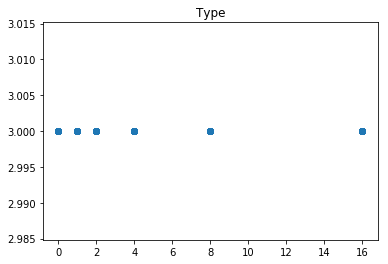

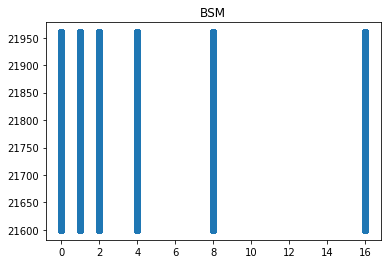

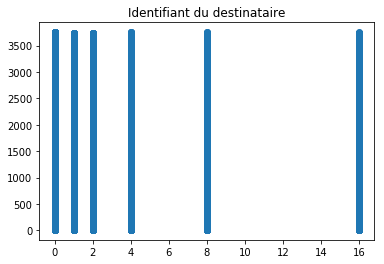

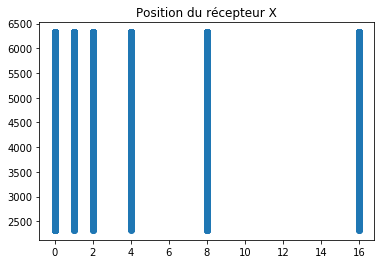

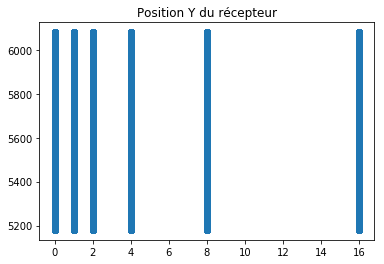

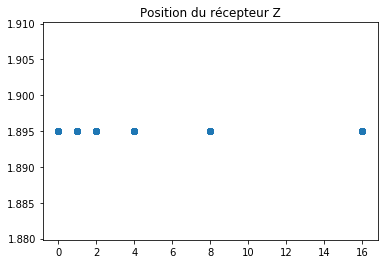

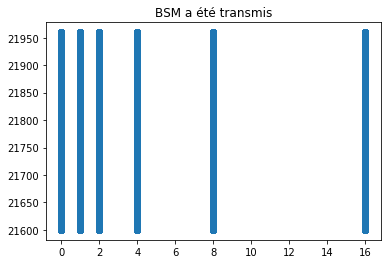

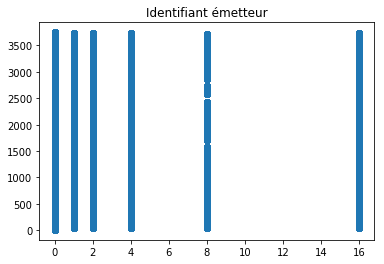

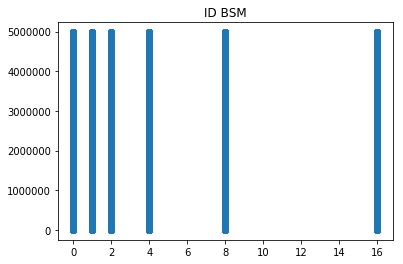

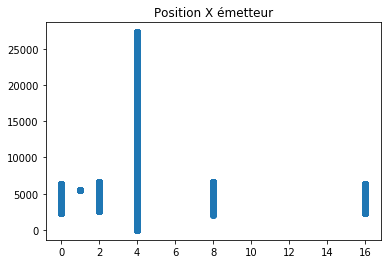

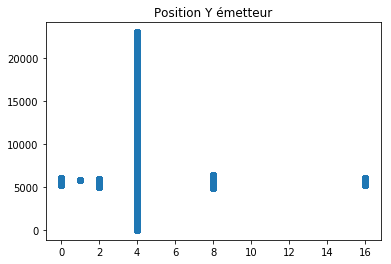

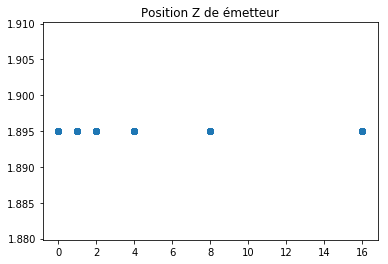

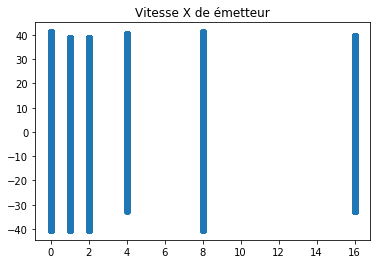

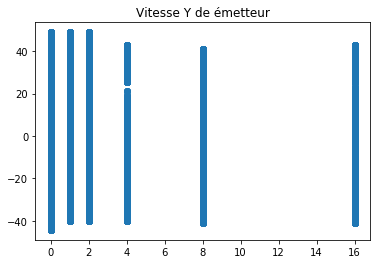

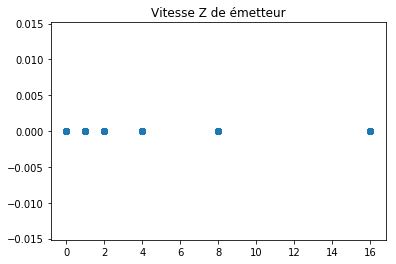

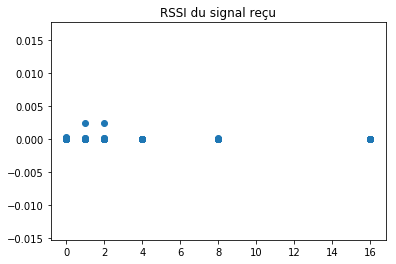

In [38]:
import matplotlib.pyplot as plt

columns = ['Type', 'BSM', 'Identifiant du destinataire', 'Position du récepteur X', 'Position Y du récepteur', 'Position du récepteur Z', 'BSM a été transmis', 'Identifiant émetteur', 'ID BSM', 'Position X émetteur', 'Position Y émetteur', 'Position Z de émetteur', 'Vitesse X de émetteur', 'Vitesse Y de émetteur', 'Vitesse Z de émetteur', 'RSSI du signal reçu', 'Label']

for i in range(len(columns)-1):
    plt.title(columns[i])
    plt.scatter(database['Label'], database[columns[i]])
    plt.show()

## Première approche
Nous affichons pour chaque donnée, une des valeurs de cette donnée en fonction de sa classification.

### Identifiant de l'émetteur
On remarque tout d'abord que pour l'erreur de label 8, plusieurs identifiants d'émetteurs sont absents.
Cette absence est à prendre avec des pincettes, cela est peut-être un hasard.

### Positions X et Y
On remarque que les signaux de label 1 et 24ont des positions totalement différentes. La position X est quasi constante pour le label 1 aux alentours de 5000 et entre 0 et 30 000 pour le label 4. Alors que pour les autres labels, la position X tourne plus entre 2000 et 5000.
Pour la position en Y, on voit de même une position plus localisée pour le label 1 et très diffuse pour le label 4.

### Vitesse en X
On remarque ici que pour les labels 4 et 16 la vitesse ne peut aller en dessous de -30.

### Vitesse en Y
On remarque que presque tous les labels ont des intervalles de vitesse différents

### RSSI du signal reçu
On remarque que pour les labels 1 et 2, il y a deux intervalles distincts contrairement aux autres

### Conclusion 
On remarque que certaines données ont des valeurs différentes en fonction des labels. Il faudra donc que nous déterminions si ce sont des différences qui sont vraiment à prendre en compte ou si cela est un biais dû aux mesures des données. Cependant cela est peu probable puisque la base de données contient 2 126 976 données.
